In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
data=pd.read_csv("../seaborn-data/tips.csv")

In [3]:
data[:10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
total_bill=data['total_bill'].values

In [8]:
total_bill[:10]

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78])

In [9]:
total_bill.size

244

In [55]:
tip=data['tip'].values

In [56]:
tip.size

244

In [12]:
tip[:10]

array([1.01, 1.66, 3.5 , 3.31, 3.61, 4.71, 2.  , 3.12, 1.96, 3.23])

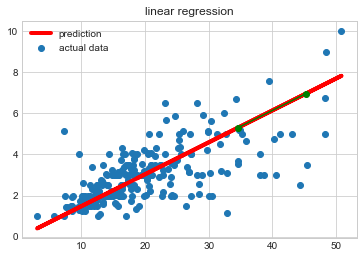

In [40]:
plt.scatter(x=total_bill,y=tip,label="actual data")
plt.plot(total_bill,m*total_bill+c,c='r',lw=4,label="prediction")
plt.plot([45.22,34.55],[m*45.22+c,m*34.55+c],c='g',marker='o')
plt.legend()
plt.title("linear regression")
plt.show()

In [17]:
a=((tip-tip.mean())**2).sum()

In [18]:
a

465.21247704918045

In [19]:
b=((total_bill-total_bill.mean())**2).sum()

In [20]:
b

19258.46408319672

In [21]:
m=np.sqrt(a/b)

In [22]:
m

0.1554228445074726

In [23]:
c=tip.mean()-m*total_bill.mean()

In [24]:
c

-0.07690879519606986

In [50]:
t=float(input("enter total_bill:"))
tips=m*t+c
print(f"tip for tis bill {t} is {tips:.2f}")

enter total_bill:23.44
tip for tis bill 23.44 is 3.57


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
feature=total_bill.reshape(-1,1)

In [58]:
target=tip

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.5 ,  3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  2.  ,
        2.  ,  4.3 ,  3.  ,  1.45,  2.5 ,  3.  ,  2.45,  3.27,  3.6 ,
        2.  ,  3.07,  2.31,  5.  ,  2.24,  2.54,  3.06,  1.32,  5.6 ,
        3.  ,  5.  ,  6.  ,  2.05,  3.  ,  2.5 ,  2.6 ,  5.2 ,  1.56,
        4.34,  3.51,  3.  ,  1.5 ,  1.76,  6.73,  3.21,  2.  ,  1.98,
        3.76,  2.64,  3.15,  2.47,  1.  ,  2.01,  2.09,  1.97,  3.  ,
        3.14,  5.  ,  2.2 ,  1.25,  3.08,  4.  ,  3.  ,  2.71,  3.  ,
        3.4 ,  1.83,  5.  ,  2.03,  5.17,  2.  ,  4.  ,  5.85,  3.  ,
        3.  ,  3.5 ,  1.  ,  4.3 ,  3.25,  4.73,  4.  ,  1.5 ,  3.  ,
        1.5 ,  2.5 ,  3.  ,  2.5 ,  3.48,  4.08,  1.64,  4.06,  4.29,
        3.76,  4.  ,  3.  ,  1.  ,  4.  ,  2.55,  4.  ,  3.5 ,  5.07,
        1.5 ,  1.8 ,  2.92,  2.31,  1.68,  2.5 ,  2.  ,  2.52,  4.2 ,
        1.48,  2.  ,

In [59]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=.3)

In [60]:
x_train.size

170

In [61]:
model=LinearRegression()

In [62]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
model.predict([[23.45],[45.67],[78.99]])

array([3.44126133, 5.9740376 , 9.77206214])

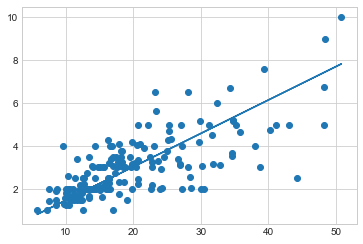

In [68]:
plt.scatter(x_train,y_train)
plt.plot(x_train,m*x_train+c)
plt.show()

In [66]:
model.coef_

array([0.11398633])

In [67]:
model.intercept_

0.7682818762497226

In [69]:
y_predict=model.predict(x_test)

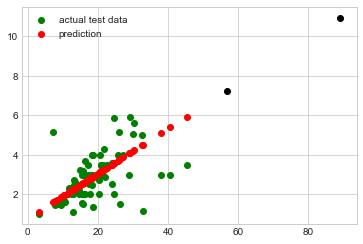

In [76]:
plt.scatter(x_test,y_test,label="actual test data",c='g')
plt.scatter(x_test,y_predict,label="prediction",c='r')
plt.scatter([56.88,89.00],[model.predict(56.88),model.predict(89.00)],c='black')
plt.legend()
plt.show()